# Bayes A/B Testing

## References

* GitHub: [CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

In [76]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import pymc3 as pm3

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(12, 4)

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Data

In [107]:
true_p_A = 0.05
true_p_B = 0.04
N_A = 1500
N_B = 750

observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)

In [108]:
print("Observed frequencey of A: {:.3f}".format(observations_A.mean()))
print("Observed frequencey of B: {:.3f}".format(observations_B.mean()))

Observed frequencey of A: 0.043
Observed frequencey of B: 0.028


# Modeling

In [109]:
with pm3.Model() as model3:
    p_A = pm3.Uniform('p_A', lower=0, upper=1)
    p_B = pm3.Uniform('p_B', lower=0, upper=1)
    
    delta = pm3.Deterministic('delta', p_A - p_B)
    
    obs_A = pm3.Bernoulli('obs_A', p_A, observed=observations_A)
    obs_B = pm3.Bernoulli('obs_B', p_B, observed=observations_B)
    
    trace = pm3.sample(25000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_B, p_A]
Sampling 2 chains: 100%|██████████| 51000/51000 [00:21<00:00, 2347.31draws/s]


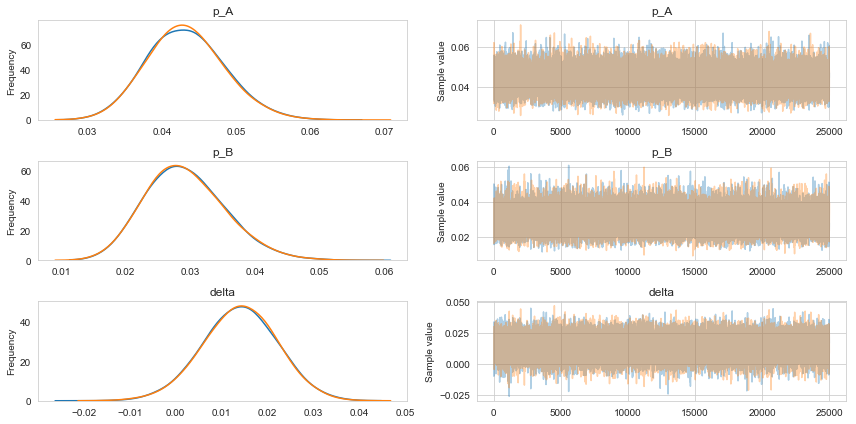

In [110]:
pm3.traceplot(trace);

In [111]:
pm3.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p_A,0.043286,0.005243,0.000022,0.033392,0.053873,52408.540752,0.999984
p_B,0.029297,0.006194,0.000030,0.017838,0.041789,52239.098321,1.000005
delta,0.013989,0.008076,0.000038,-0.001502,0.030316,51947.720865,0.999987


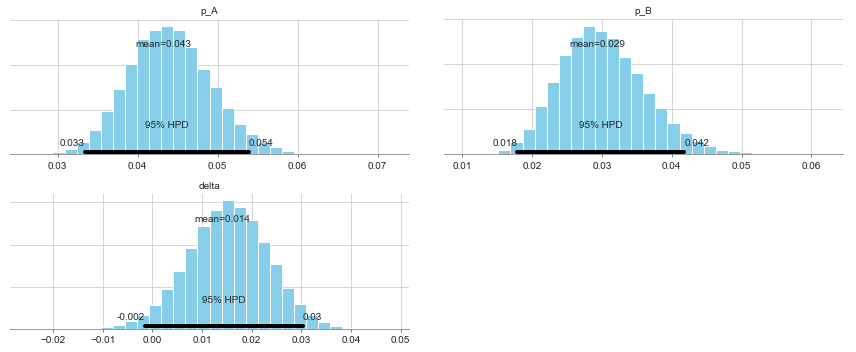

In [112]:
pm3.plot_posterior(trace);

In [113]:
p_A_samples = trace["p_A"]
p_B_samples = trace["p_B"]
delta_samples = trace["delta"]

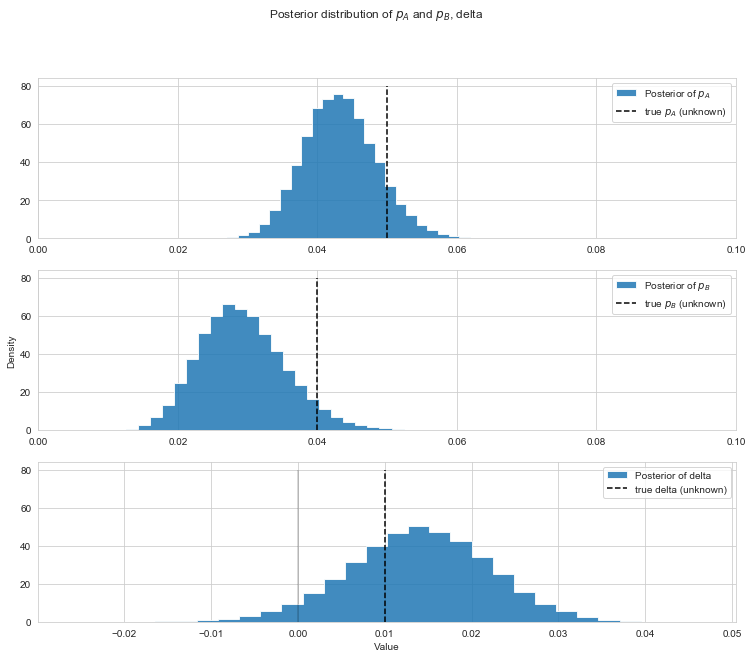

In [124]:
figsize(12.5, 10)

# p_A_samples
ax = plt.subplot(311)
plt.hist(p_A_samples, bins=30, histtype="stepfilled", normed=True, alpha=0.85, label="Posterior of $p_A$")
plt.vlines(true_p_A, 0, 80, linestyles="--", label="true $p_A$ (unknown)")
plt.suptitle("Posterior distribution of $p_A$ and $p_B$, delta")
plt.xlim(0, 0.1)
plt.legend()

# p_B_samples
ax = plt.subplot(312)
plt.hist(p_B_samples, bins=30, histtype="stepfilled", normed=True, alpha=0.85, label="Posterior of $p_B$")
plt.vlines(true_p_B, 0, 80, linestyles="--", label="true $p_B$ (unknown)")
plt.xlim(0, 0.1)
plt.ylabel("Density")
plt.legend()

# delta_samples
ax = plt.subplot(313)
plt.hist(delta_samples, bins=30, histtype="stepfilled", normed=True, alpha=0.85, label="Posterior of delta")
plt.vlines(true_p_A - true_p_B, 0, 80, linestyles="--", label="true delta (unknown)")
plt.vlines(0, 0, 80, alpha=0.2) # zero
plt.xlabel("Value")
plt.legend();

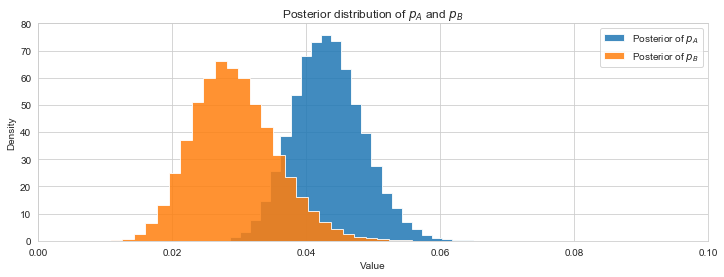

In [126]:
figsize(12, 4)
plt.hist(p_A_samples, bins=30, histtype="stepfilled", normed=True, alpha=0.85, label="Posterior of $p_A$")
plt.xlim(0, 0.1)
plt.legend()

plt.hist(p_B_samples, bins=30, histtype="stepfilled", normed=True, alpha=0.85, label="Posterior of $p_B$")
plt.xlim(0, 0.1)
plt.ylim(0, 80)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Posterior distribution of $p_A$ and $p_B$")
plt.legend();

In [128]:
print("Probability of site A is WORSE than site B: {:.3f}".format((delta_samples < 0).mean()))
print("Probability of site A is BETTER than site B: {:.3f}".format((delta_samples > 0).mean()))

Probability of site A is WORSE than site B: 0.044
Probability of site A is BETTER than site B: 0.956
